<a href="https://colab.research.google.com/github/HRKagdi/Machine-Learning/blob/master/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
from sklearn.datasets import load_iris
data = load_iris()

In [0]:
print(data.target.shape)

(150,)


In [0]:
X=data.data
Y=data.target

In [0]:
#Code for randomly shuffling the dataset
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X)
from sklearn.utils import shuffle
X, X_sparse, y = shuffle(X, X_sparse, Y, random_state=0)
X=X_sparse.toarray()
Y=y

In [0]:
print(X.shape)

(150, 4)


In [0]:
Y=Y.reshape(150,1)

In [0]:
#Divivding the dataset into training and testing 
train_X=X[0:125,:]
train_Y=Y[0:125,:]
test_X=X[125:,:]
test_Y=Y[125:,:]

In [0]:
def sigmoid(x):
  for i in range(0,x.shape[0]):
    x[i]=1/(1+np.exp(-1*x[i]))
  return x

In [0]:
def CategoricalCrossEntropy(yhat,y):
  for i in range(0,3):
    yhat[i]=np.log(yhat[i])
    error=-1*np.multiply(np.transpose(y[i]),yhat[i])  
  return error

In [0]:
def diffSigmoid(x):
  for i in  range(0,len(x)):
    y=1/(1+np.exp(-1*x[i]))
    x[i]=y*(1-y)
  return x 

In [0]:
print(Y)

[[2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [1]
 [2]
 [0]]


In [0]:
print(Y.shape)

(150, 1)


In [0]:
#Random initialization of Weights Matrices
#Model contains 4 layers having 4->8->8->3 neurons respectively
w12=np.random.rand(8,4)
b1=np.random.rand(8,1)
w23=np.random.rand(8,8)
b2=np.random.rand(8,1)
w34=np.random.rand(3,8)
b3=np.random.rand(3,1)

In [0]:
print(w23)

[[0.26521029 0.19607514 0.68056943 0.98076644 0.40282972 0.95578381
  0.70816843 0.61131756]
 [0.00463606 0.12853528 0.40764701 0.33706236 0.20279253 0.41489738
  0.05060349 0.93811047]
 [0.87382227 0.47715816 0.11422767 0.84765575 0.9208606  0.76424913
  0.79058365 0.49070702]
 [0.28188332 0.530128   0.85830339 0.35016386 0.4287921  0.72991331
  0.63188263 0.10069622]
 [0.98613578 0.77317728 0.85535407 0.83980292 0.24590206 0.93700188
  0.18138452 0.56236156]
 [0.78000942 0.18130444 0.29672875 0.90874717 0.81273627 0.47906249
  0.50704212 0.45815299]
 [0.34365619 0.01126937 0.97729275 0.67282793 0.02877731 0.30796739
  0.19133958 0.81101015]
 [0.75588616 0.17753406 0.89423525 0.62044747 0.28041694 0.30184606
  0.69643528 0.76419904]]


In [0]:
def forwardPropagation(X,Y,dict2):
    dict ={}
    w12=dict2["w12"]
    w23=dict2["w23"]
    w34=dict2["w34"]
    b1=dict2["b1"]
    b2=dict2["b2"]
    b3=dict2["b3"]
    X=np.asarray(X)
    X=X.reshape((4,1))
    net1=np.dot(w12,X)+b1
    a1=sigmoid(net1)
    net2=np.dot(w23,a1)+b2
    a2=sigmoid(net2)
    net3=np.dot(w34,a2)+b3
    a3=sigmoid(net3)
    error=1/2*np.sum(pow((Y-a3),2))
    dict["a1"]=a1
    dict["a2"]=a2
    dict["a3"]=a3
    dict["net1"]=net1
    dict["net2"]=net2
    dict["net3"]=net3
    dict["err"]=error
    return dict

In [0]:
#u=np.ones(net2.shape)

In [0]:
def Backpropagation(X,y,alpha,dict,dict2):
  a1=dict["a1"]
  a2=dict["a2"]
  a3=dict["a3"]
  net1=dict["net1"]
  net2=dict["net2"]
  net3=dict["net3"]
  error=dict["err"]
  w12=dict2["w12"]
  w23=dict2["w23"]
  w34=dict2["w34"]
  b1=dict2["b1"]
  b2=dict2["b2"]
  b3=dict2["b3"]
  y1=np.zeros((3,1))
  y1[y]=1
  a3=a3.reshape((3,1))
  a2=a2.reshape((8,1))
  a1=a1.reshape((8,1))
  X=np.asarray(X)
  X=X.reshape((4,1))
  temp=np.multiply(a3-y1,np.multiply(a3,np.ones(a3.shape)-a3))
  temp2=np.multiply(np.dot(temp.transpose(),w34).T,np.multiply(a2,np.ones(a2.shape)-a2))
  temp3=np.multiply(np.dot(temp2.transpose(),w23).T,np.multiply(a1,np.ones(a1.shape)-a1))
  w34=w34-(alpha)*(np.dot(temp,a2.T))
  b3=b3-(alpha)*temp 
  w23=w23-(alpha)*(np.dot(temp2,a1.T))
  b2=b2-(alpha)*temp2
  w12=w12-(alpha)*(np.dot(temp3,X.T))            
  b1=b1-(alpha)*(temp3)
  dict2["w12"]=w12
  dict2["w23"]=w23 
  dict2["w34"]=w34
  dict2["b1"]=b1
  dict2["b2"]=b2
  dict2["b3"]=b3
  return dict2

In [0]:
def main(X,y):
  max_iter=8000
  alpha=0.01
  weights={}
  cost_list=[]
  weights["w12"]=w12
  weights["w23"]=w23 
  weights["w34"]=w34
  weights["b1"]=b1
  weights["b2"]=b2
  weights["b3"]=b3
  weights['No_of_Iter']=max_iter
  while(True):
    for i in range(1,X.shape[0]):
      d1=forwardPropagation(X[i],y[i],weights)
      weights=Backpropagation(X[i],y[i],alpha,d1,weights)
      curr_error=d1["err"]
    max_iter=max_iter-1
    if(max_iter<0):
      break
    final=d1["err"]
    cost_list.append(final)
    print(final)
  weights['cost']=cost_list
  return weights

In [0]:
ans=main(train_X,train_Y)


Streaming output truncated to the last 5000 lines.
4.064430169242889
4.064737549512097
4.065052522819892
4.0653750907202015
4.06570525460374
4.0660430156469305
4.066388374761781
4.066741332546729
4.067101889238429
4.0674700446644945
4.067845798197186
4.0682291487080295
4.06862009452339
4.069018633380973
4.069424762387265
4.069838477975938
4.070259775867168
4.070688651027951
4.0711250976333435
4.07156910902871
4.072020677692936
4.072479795202661
4.072946452197513
4.073420638346388
4.0739023423147716
4.074391551733151
4.074888253166493
4.0753924320848505
4.075904072835101
4.076423158613828
4.076949671441395
4.077483592137201
4.0780249002961595
4.078573574266421
4.0791295911283445
4.079692926674753
4.080263555392484
4.08084145044525
4.081426583657832
4.082018925501619
4.082618445081504
4.083225110124141
4.083838886967597
4.0844597405523935
4.0850876344139255
4.085722530676305
4.086364390047601
4.087013171816483
4.087668833850286
4.088331332594461
4.089000623073453
4.089676658892942
4.0903

In [0]:
u=ans["w23"]
print(u)

[[ 0.40870256  0.22185891  0.71562392  1.14412364  0.56617815  0.91713636
   0.86527185  0.77399212]
 [-1.52008741 -0.12690242  4.90890863 -1.40635727 -1.53989546  8.22174117
  -1.60783353 -0.79807666]
 [ 0.93262648  0.49580245  0.12747348  0.91463832  0.98783648  0.74677688
   0.85520727  0.55746179]
 [-0.38110461  5.3835777   3.76156278 -0.55455377 -0.47589112  5.20603211
  -0.16330971 -0.79057212]
 [ 1.09423933  0.8053028   0.87624549  0.95516992  0.3612625   0.92784706
   0.29431908  0.6774668 ]
 [ 0.78670517  0.14219059  0.24928882  0.90353494  0.80752797  0.46297283
   0.50460615  0.45318578]
 [ 0.46832399 -0.1119941   0.92005354  0.81377377  0.16972267  0.1973052
   0.32563998  0.95109055]
 [ 0.75687511  0.09623142  0.81700832  0.59340784  0.25339026  0.31213
   0.67612259  0.73773786]]


In [0]:
#Prediction
from sklearn.metrics import mean_squared_error
pred=forwardPropagation(test_X[19],test_Y[19],ans);
print(pred["a3"])
print(test_Y[19])

[[0.97704749]
 [0.02534947]
 [0.00129622]]
[0]


In [0]:
test_X.shape

(25, 4)

<function matplotlib.pyplot.show>

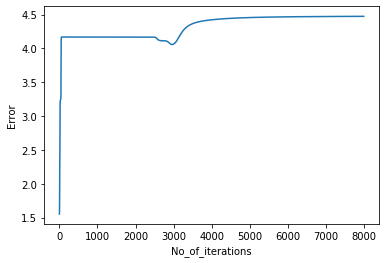

In [0]:
i=ans['No_of_Iter']
iter=np.arange(0,i)
error=ans['cost']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show